In [1]:
import pandas as pd

cnts = pd.read_csv("binfo1-datapack1/read-counts.txt", sep='\t', comment='#', index_col=0)

print(cnts.head())

                                                     Chr  \
Geneid                                                     
ENSMUSG00000102693.2                                chr1   
ENSMUSG00000064842.3                                chr1   
ENSMUSG00000051951.6  chr1;chr1;chr1;chr1;chr1;chr1;chr1   
ENSMUSG00000102851.2                                chr1   
ENSMUSG00000103377.2                                chr1   

                                                                  Start  \
Geneid                                                                    
ENSMUSG00000102693.2                                            3143476   
ENSMUSG00000064842.3                                            3172239   
ENSMUSG00000051951.6  3276124;3276746;3283662;3283832;3284705;349192...   
ENSMUSG00000102851.2                                            3322980   
ENSMUSG00000103377.2                                            3435954   

                                                     

In [4]:
print(cnts.columns)

Index(['Chr', 'Start', 'End', 'Strand', 'Length', 'CLIP-35L33G.bam',
       'RNA-control.bam', 'RNA-siLin28a.bam', 'RNA-siLuc.bam',
       'RPF-siLin28a.bam', 'RPF-siLuc.bam', 'clip_enrichment', 'rden_change'],
      dtype='object')


In [3]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

print(cnts.head())

                                                     Chr  \
Geneid                                                     
ENSMUSG00000102693.2                                chr1   
ENSMUSG00000064842.3                                chr1   
ENSMUSG00000051951.6  chr1;chr1;chr1;chr1;chr1;chr1;chr1   
ENSMUSG00000102851.2                                chr1   
ENSMUSG00000103377.2                                chr1   

                                                                  Start  \
Geneid                                                                    
ENSMUSG00000102693.2                                            3143476   
ENSMUSG00000064842.3                                            3172239   
ENSMUSG00000051951.6  3276124;3276746;3283662;3283832;3284705;349192...   
ENSMUSG00000102851.2                                            3322980   
ENSMUSG00000103377.2                                            3435954   

                                                     

/Users/myrmecia/.pyenv/versions/3.9.5/envs/bioinfo/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


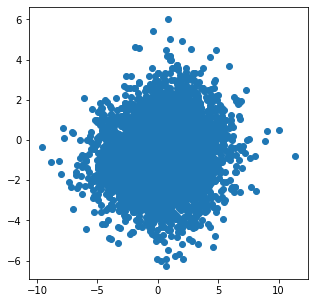

In [6]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(
    np.log2(cnts['clip_enrichment']),
    np.log2(cnts['rden_change'])
)

In [28]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')

print(mouselocal.head())

              gene_id            Gene names       type
0  ENSMUSG00000000001                 Gnai3  cytoplasm
1  ENSMUSG00000000028  Cdc45 Cdc45l Cdc45l2    nucleus
2  ENSMUSG00000000049            Apoh B2gp1  cytoplasm
3  ENSMUSG00000000058                  Cav2  cytoplasm
4  ENSMUSG00000000085                 Scmh1    nucleus


In [29]:
mouselocal = mouselocal.set_index('gene_id')

print(mouselocal.head())

                              Gene names       type
gene_id                                            
ENSMUSG00000000001                 Gnai3  cytoplasm
ENSMUSG00000000028  Cdc45 Cdc45l Cdc45l2    nucleus
ENSMUSG00000000049            Apoh B2gp1  cytoplasm
ENSMUSG00000000058                  Cav2  cytoplasm
ENSMUSG00000000085                 Scmh1    nucleus


In [81]:
tmp_target = cnts[['clip_enrichment', 'rden_change']]

# remove gene id version
tmp_target.index = [x[:x.rfind('.')] for x in list(tmp_target.index)]

# remove inf, -inf, NaN
tmp_target = tmp_target.replace([np.inf, -np.inf], np.nan)
tmp_target_= tmp_target.dropna(axis=0)

# remove unmatched (which shows up as NaN)
tmp_target_ = pd.merge(mouselocal, tmp_target_, left_index=True, right_index=True, how='right')
tmp_target_ = tmp_target_.dropna(axis=0)

print(tmp_target_.head())

                              Gene names       type  clip_enrichment  \
ENSMUSG00000000001                 Gnai3  cytoplasm         2.762901   
ENSMUSG00000000028  Cdc45 Cdc45l Cdc45l2    nucleus         1.011928   
ENSMUSG00000000058                  Cav2  cytoplasm         0.000000   
ENSMUSG00000000085                 Scmh1    nucleus         1.051546   
ENSMUSG00000000093                  Tbx2    nucleus         0.000000   

                    rden_change  
ENSMUSG00000000001     0.637359  
ENSMUSG00000000028     0.521917  
ENSMUSG00000000058     0.000000  
ENSMUSG00000000085     0.277646  
ENSMUSG00000000093     0.200000  


In [133]:
def sampling(size, seed):
    tmp_cytoplasm = tmp_target_.loc[tmp_target_.type == 'cytoplasm']
    #print(tmp_cytoplasm.head(), '\n\n')
    #print(len(tmp_cytoplasm), '\n\n')
    tmp_cytoplasm_sample = tmp_cytoplasm.sample(n = size, random_state=seed)

    tmp_nucleus = tmp_target_.loc[tmp_target_.type == 'nucleus']
    #print(tmp_nucleus.head(), '\n\n')
    #print(len(tmp_nucleus), '\n\n')
    tmp_nucleus_sample = tmp_nucleus.sample(n = size, random_state=seed)

    tmp_memprotein = tmp_target_.loc[tmp_target_.type == 'integral membrane']
    #print(tmp_memprotein.head(), '\n\n')
    #print(len(tmp_memprotein), '\n\n')
    tmp_memprotein_sample = tmp_memprotein.sample(n = size, random_state=seed)

    tmp_target_df = pd.concat([
        tmp_cytoplasm_sample, tmp_nucleus_sample, tmp_memprotein_sample
    ])

    return tmp_target_df

/Users/myrmecia/.pyenv/versions/3.9.5/envs/bioinfo/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/myrmecia/.pyenv/versions/3.9.5/envs/bioinfo/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/myrmecia/.pyenv/versions/3.9.5/envs/bioinfo/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


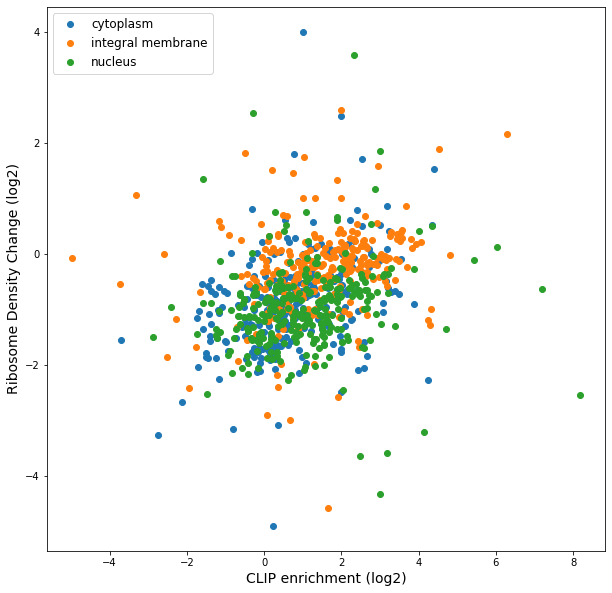

In [135]:
tmp_target_df = sampling(size=300, seed=125)

tmp_groups = tmp_target_df.groupby('type')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for name, group in tmp_groups:
    ax.plot(
    np.log2(group.clip_enrichment), 
    np.log2(group.rden_change),
    marker = 'o',
    linestyle = '',
    label = name
)

ax.legend(fontsize=12, loc='upper left')
plt.xlabel("CLIP enrichment (log2)", fontsize=14)
plt.ylabel("Ribosome Density Change (log2)", fontsize=14)
plt.show()